<a href="https://colab.research.google.com/github/bijivemulasumanthkumarreddy/oibsip_3/blob/main/Sales_productuon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sm
from warnings import filterwarnings
filterwarnings('ignore')
from numpy.linalg import inv
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Advertising.csv")

In [ ]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data.sample(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
18,19,69.2,20.5,18.3,11.3
180,181,156.6,2.6,8.3,10.5
168,169,215.4,23.6,57.6,17.1
191,192,75.5,10.8,6.0,9.9
193,194,166.8,42.0,3.6,19.6


In [ ]:
data.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [ ]:
type(data['TV'][0])

numpy.float64

In [ ]:
figure = px.scatter(data_frame = data, x="TV",
                    y="Sales", size="TV", trendline="ols")
figure.show()

figure = px.scatter(data_frame = data, x="Newspaper",
                    y="Sales", size="Newspaper", trendline="ols")
figure.show()

figure = px.scatter(data_frame = data, x="Radio",
                    y="Sales", size="Radio", trendline="ols")
figure.show()

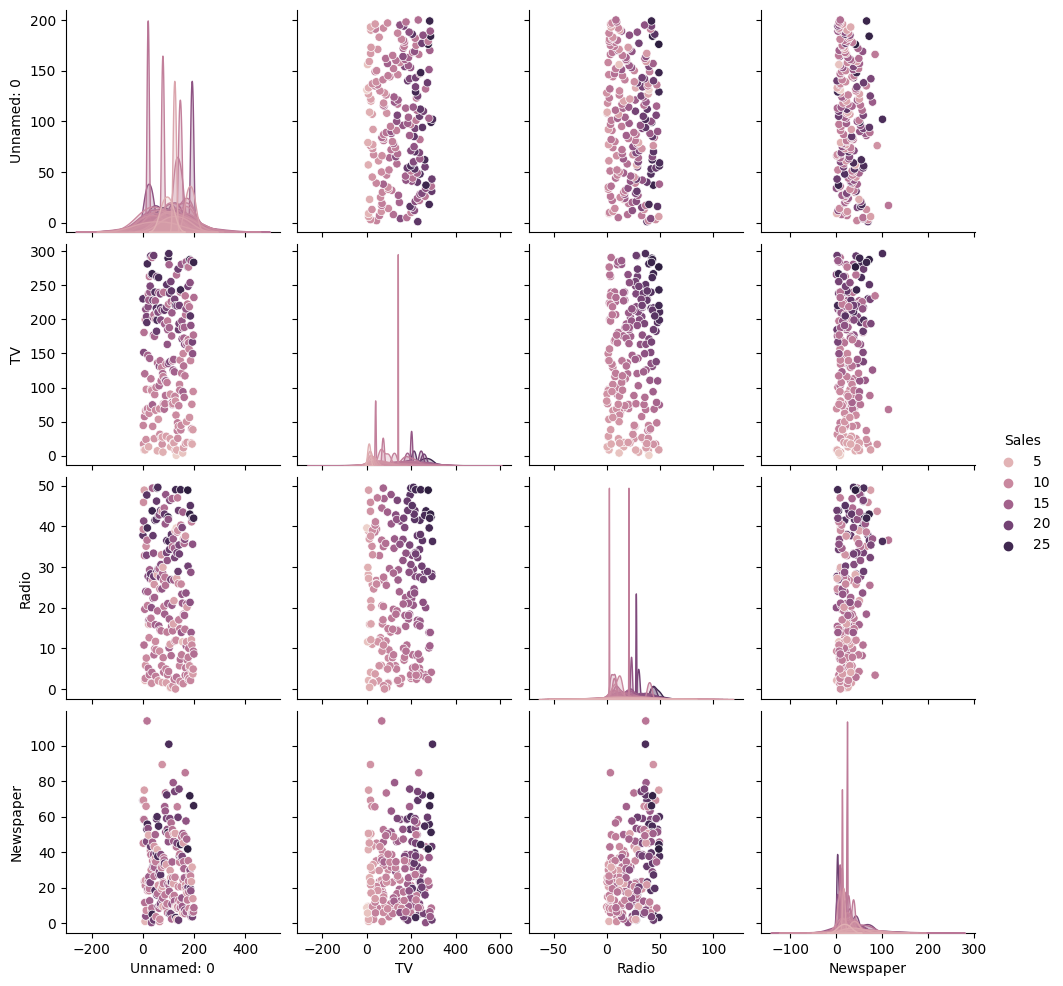

In [ ]:

sns.pairplot(data,hue='Sales')

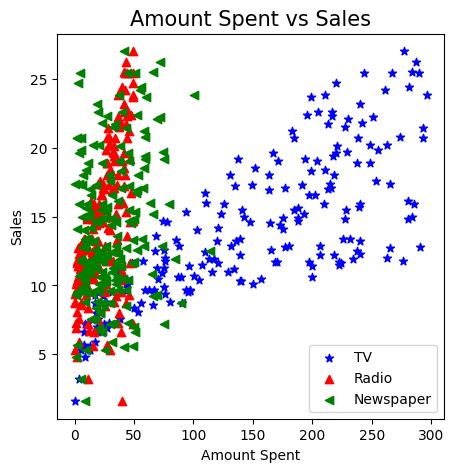

In [ ]:
plt.figure(figsize=(5, 5))
plt.scatter(data['TV'],data['Sales'], c="blue", label="TV", marker = '*')
plt.scatter(data['Radio'],data['Sales'], c="red", label="Radio", marker = '^')
plt.scatter(data['Newspaper'],data['Sales'], c="green", label="Newspaper", marker = '<')
plt.xlabel("Amount Spent")
plt.ylabel("Sales")
plt.title("Amount Spent vs Sales", fontsize=15)
plt.legend()
plt.show()

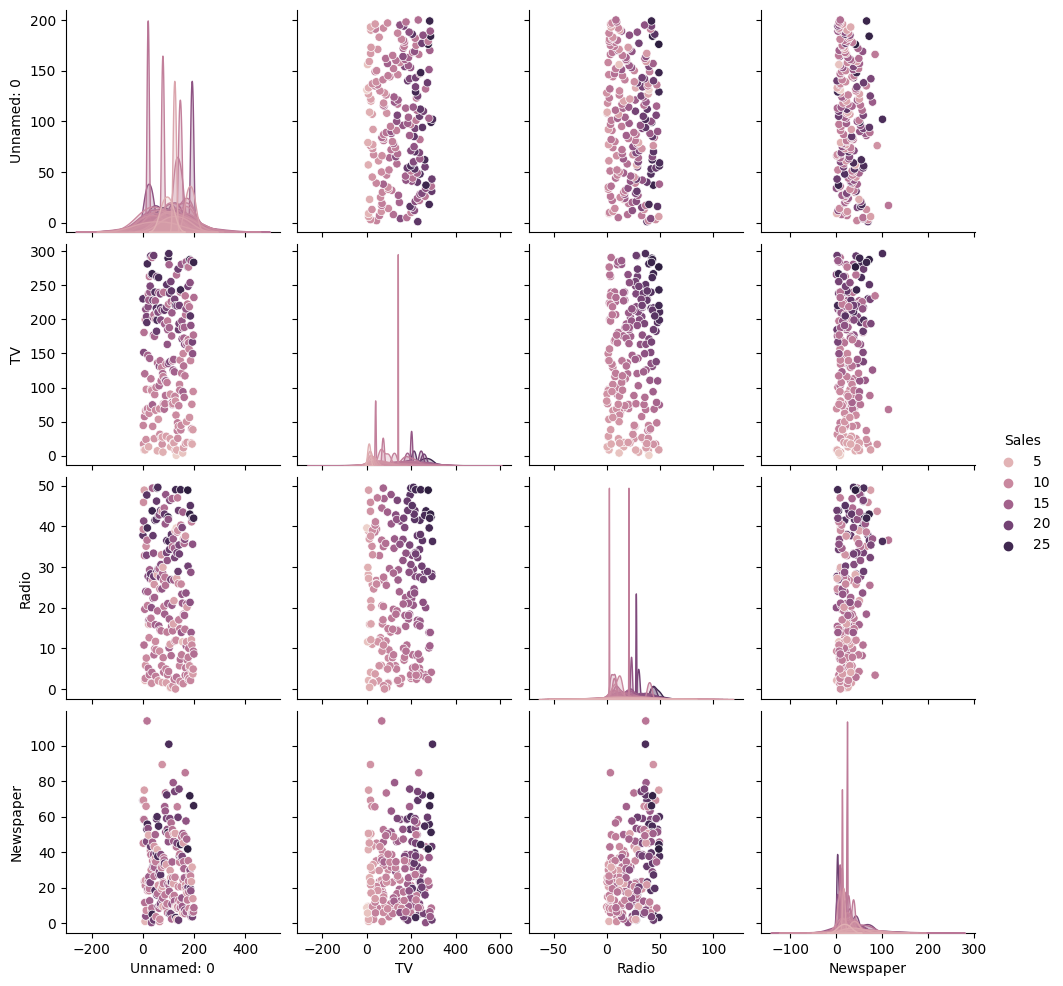

In [ ]:
sns.pairplot(data,hue='Sales')

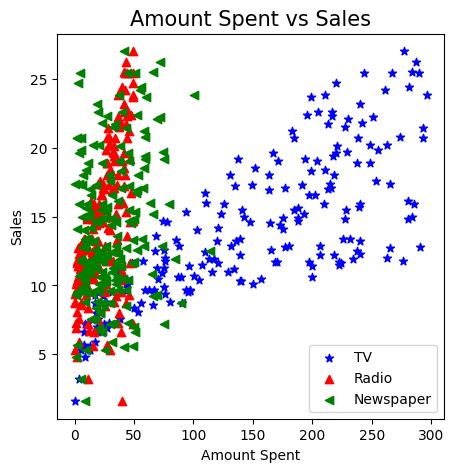

In [ ]:

plt.figure(figsize=(5, 5))
plt.scatter(data['TV'],data['Sales'], c="blue", label="TV", marker = '*')
plt.scatter(data['Radio'],data['Sales'], c="red", label="Radio", marker = '^')
plt.scatter(data['Newspaper'],data['Sales'], c="green", label="Newspaper", marker = '<')
plt.xlabel("Amount Spent")
plt.ylabel("Sales")
plt.title("Amount Spent vs Sales", fontsize=15)
plt.legend()
plt.show()

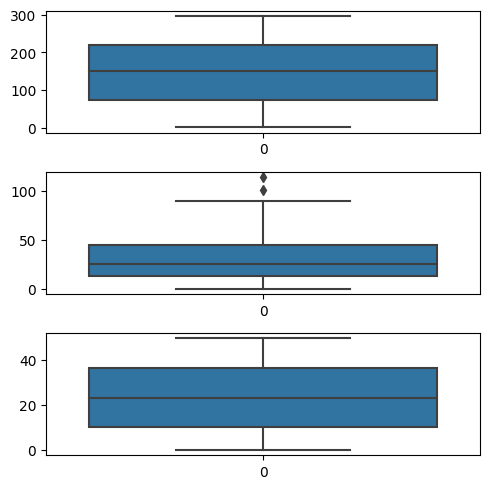

In [ ]:

fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(data['TV'], ax = axs[0])
plt2 = sns.boxplot(data['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(data['Radio'], ax = axs[2])
plt.tight_layout()
plt.show()

In [ ]:

correlation = data.corr()
print(correlation["Sales"].sort_values(ascending=False))

Sales         1.000000
TV            0.782224
Radio         0.576223
Newspaper     0.228299
Unnamed: 0   -0.051616
Name: Sales, dtype: float64


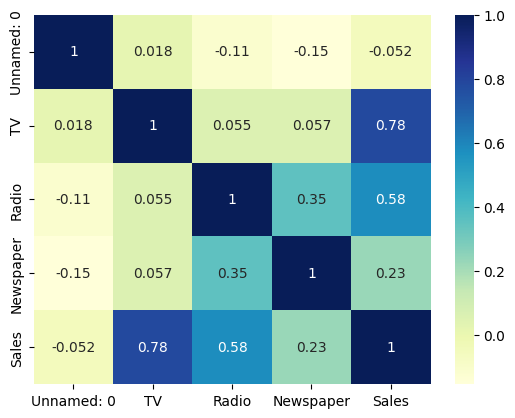

In [ ]:

sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [ ]:

x = np.array(data.drop(['Sales'], axis=1))
y = np.array(data['Sales'])

Xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:

model = LinearRegression()
model.fit(Xtrain, ytrain)
print(model.score(xtest, ytest))

0.8986489151417082


In [ ]:

import pickle
pickle.dump(model, open('model.pkl','wb'))

In [ ]:
import pickle
pickle.dump(model, open('model.pkl','wb'))

In [ ]:

#features = [[TV, Radio, Newspaper]]
features = np.array([[400, 0,0,0]])
print(model.predict(features))

[3.1639631]
